# Titanic Surivor Data - A Binary Classification

In this Notebook, I will be showing a full scale Machine Learning application process. This means obtaining our data, processing this data, visualizing it, learning from it, and trying to make predictions. Although this is a simple project, I will leverage some great Machine Learning techniques in an attempt to maximize the success of our algorithm.

This is a Binary Classification problem, which means it is a Supervised Learning problem. Supervised Learning meaning for our input space X we have an expected output y. Meaning, for all our data about an individual, we also know if they survived or not. For this specific problem, I'll be comparing and contrasting a few algorithms, specifically Logistic Regression, Random Forest, and K Nearest Neighbors.

With algorithms selected, we will also use a couple other things to try and get the most out of our data, and out of our process. When preprocessing data, it is import to remember that Machine Learning is a mathematical computation, and thus our data needs to be numeric. So, for our categorical data we will convert the categories using Label Encoding and One Hot Encoding. To check and verify our testing, we will also be using a validation set and leverage cross validation to ensure our accuracy.

### So, lets get started! - Data Analysis/Cleaning

First, lets import everything we will need for this project. This list was added to as more things were discovered as needed.

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_curve, accuracy_score, classification_report, auc

Now we have everything we need. Lets load our data and display what we have.

In [2]:
training_data = pd.read_csv(r"C:\Users\mbowling\Desktop\Titanic\train.csv")
testing_data = pd.read_csv(r"C:\Users\mbowling\Desktop\Titanic\test.csv")
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
testing_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,0,34.5,0,0,330911,7.8292,Q
1,893,3,1,47.0,1,0,363272,7.0000,S
2,894,2,0,62.0,0,0,240276,9.6875,Q
3,895,3,0,27.0,0,0,315154,8.6625,S
4,896,3,1,22.0,1,1,3101298,12.2875,S


We have our data loaded, and we need to do some processing on it, but before we do we should analyze it. Lets combine our data into one table so we have all our information together and see what we can learn.

In [4]:
data = pd.concat([training_data, testing_data], axis=0, sort=False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


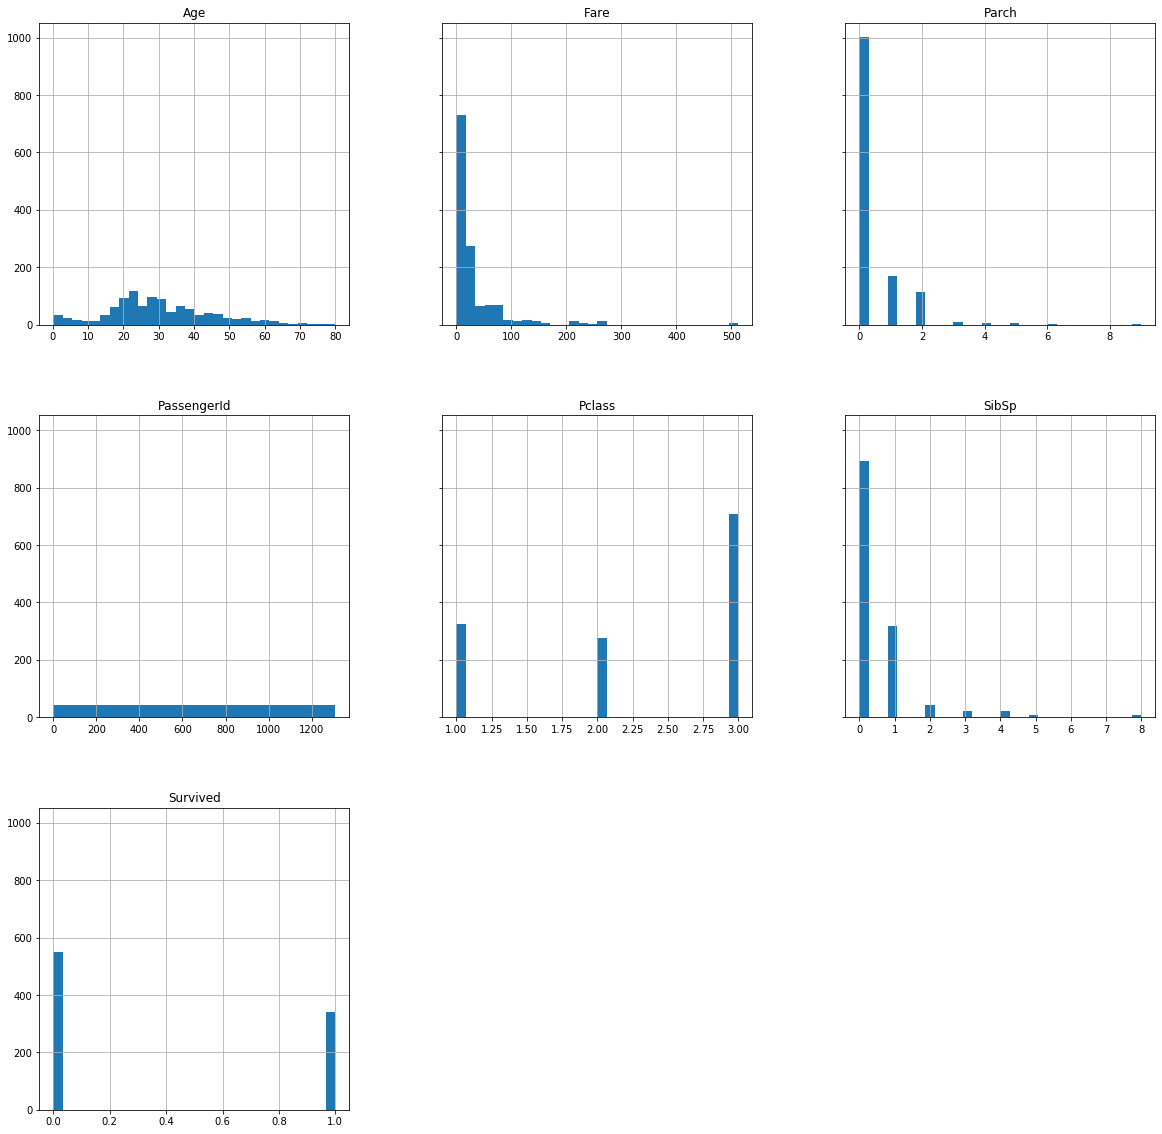

In [5]:
display(data.describe())
%matplotlib inline
hist = data.hist(bins=30, sharey=True, figsize=(20, 20))

Something important to note from the get go is our machine learning algorithms won't accept null values, so lets verify if we have any

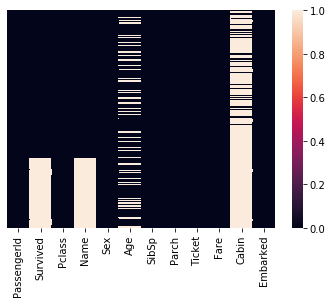

In [6]:
sns.heatmap(data.isnull(), yticklabels=False)

Our data is mising a chunk of survived and name, blatently indicated by those columns not existing in our test set. We are also missing varying levels of Cabin, Age, and Embarked. A strategy we will use to fill those will be to take the average occurance value to fill those gaps in knowledge in our data. Then we can proceed to analyze it all. So lets fill those gaps.

In [7]:
data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [8]:
data.Embarked.fillna('S', inplace=True)
data.Age.fillna(data.Age.mean(), inplace=True)
data.Fare.fillna(data.Fare.mean(), inplace=True)

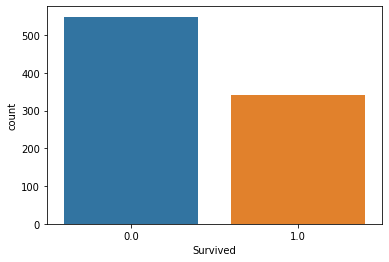

In [9]:
sns.countplot(data=data, x='Survived')

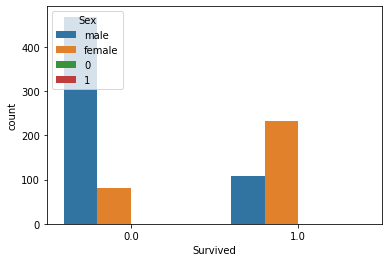

In [10]:
sns.countplot(data=data, x='Survived', hue='Sex')

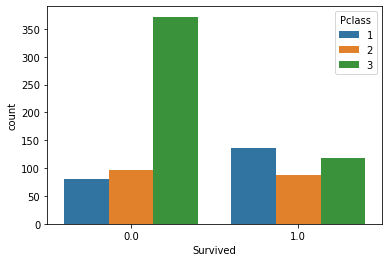

In [11]:
sns.countplot(data=data, x='Survived', hue='Pclass')

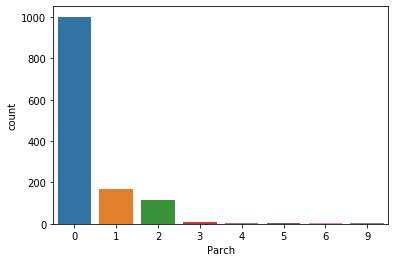

In [12]:
sns.countplot(data=data, x='Parch')

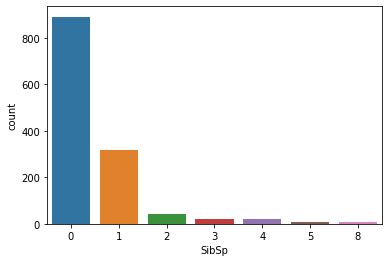

In [13]:
sns.countplot(data=data, x='SibSp')

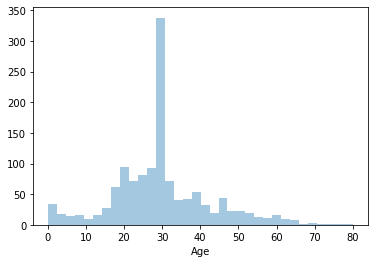

In [14]:
sns.distplot(data['Age'].dropna(), kde=False)

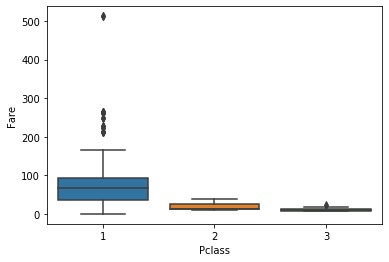

In [15]:
sns.boxplot(data=data.dropna(), x='Pclass', y='Fare')

In [16]:
data.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

With some analyzing we can see a number of things right off. First, more than half of individuals survived than died. Second, your chances of surviving were dramatically higher if you were a female. Although many more males were aboard the ship, the chance of being a male and dying was much higher. Third, the chance of survival based off what class you were is surprisingly non existant. The survivability of individuals from class 1, 2 or 3 was relatively even, despite more 3rd class individuals dying. And then for some general data, the age of individuals ranged dramatically but shows there was representation from newborns all the way to elderly. The price of tickets also varied according to what class you wanted to be in as well. And finally, we had a lot of people riding who were alone, meaning no parents, siblings, or children.

This data, although not entirely useful on its own, gives insights to make new features out of it. This process of taking raw data and creating new data from it is call Feature Engineering. It allows you to leverage the data you have to make more robust predictors from it. These predictors are then able to weigh much heavier on your model to ensure the highest predictability as possible.

Before we proceed with Feature Engineering, lets process the data we already have. We need to process a lot of our data. First, we need to fill any null/missing values in our data. We will use the average value of our data to do this. Then, we need to convert our categorical values via One Hot Encoding. This will add more columns to our table, but we don't have a large enough amount to cause a problem, then we will move to some more general clean up.

In [17]:
training_data['Embarked'] = training_data.Embarked.fillna('S')
training_data['Age'] = training_data.Age.fillna(training_data.Age.mean())
training_data['Fare'] = training_data.Fare.fillna(training_data.Fare.mean())
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


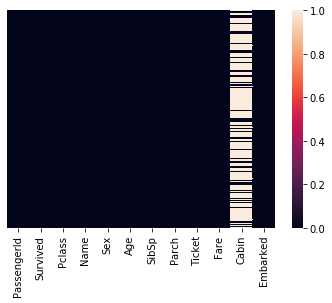

In [18]:
sns.heatmap(training_data.isnull(), yticklabels=False)

In [19]:
training_data['Fare_Bin']=pd.qcut(training_data['Fare'],6)
training_data.groupby(['Fare_Bin'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Bin,
"(-0.001, 7.775]",0.205128
"(7.775, 8.662]",0.190789
"(8.662, 14.454]",0.366906
"(14.454, 26.0]",0.436242
"(26.0, 52.369]",0.417808
"(52.369, 512.329]",0.697987


In [20]:
training_data['Sex'].replace(['male','female'],[0,1],inplace=True)
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,"(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,"(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,"(7.775, 8.662]"


So, lets break down the above. In order to use OneHotEncoder from SciKit-Learn, we needed to convert our categorical values to numerical, and then make them binary values. So I used a LabelEncoder which made our Genders either a 1 or 2. This would cause gender 2 though to be weighed more heavily, which is what we DONT want, and thus why we need a One Hot Encoder. So we used One Hot Encoder, and set value 1 = Gender_1 and value 2 = gender_0. Now all that remains for this particular step is to rename those columns and remove the sex column entirely.

Now lets do the same thing For Embarked, with the same process.

In [21]:
training_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

All of the above should look the same, aside from having to reset the index, as pandas was having an issue trying to combine our embarked categories with our main training table. The end result is the same though, where we have a column for each unique value from the Embarked table, and each of those columns contain binary values for the user. Next, we will drop a couple columns. We will drop the name since we can't use those for learning, and there are too many distinct names to encode. We will also drop cabin since we are missing far over half the data set worth of this column.

So now we have a purely numeric table with some features extracted out of our original data, such was binary representations of embarked location and male or female. There are a couple more things we can do to refine our data further. One of which is splitting our Ages into bins. Binning is a good way to take what can be regression data or large ranges of categorical data and dilute those values into smaller values, which makes it easier to make predictions with. Another feature we will spin up will be to drop SibSp and Parch and keep track of if someone was alone or not. If they had no one with them, they were alone. So lets do both of these.

In [22]:
training_data['Age_cat']=0
training_data.loc[training_data['Age']<=16,'Age_cat']=0
data.loc[(training_data['Age']>16)&(training_data['Age']<=32),'Age_cat']=1
data.loc[(training_data['Age']>32)&(training_data['Age']<=48),'Age_cat']=2
data.loc[(training_data['Age']>48)&(training_data['Age']<=64),'Age_cat']=3
data.loc[training_data['Age']>64,'Age_cat']=4

In [23]:
training_data['Fare_cat']=0
training_data.loc[training_data['Fare']<=7.775,'Fare_cat']=0
training_data.loc[(training_data['Fare']>7.775)&(training_data['Fare']<=8.662),'Fare_cat']=1
training_data.loc[(training_data['Fare']>8.662)&(training_data['Fare']<=14.454),'Fare_cat']=2
training_data.loc[(training_data['Fare']>14.454)&(training_data['Fare']<=26.0),'Fare_cat']=3
training_data.loc[(training_data['Fare']>26.0)&(training_data['Fare']<=52.369),'Fare_cat']=4
training_data.loc[training_data['Fare']>52.369,'Fare_cat']=5

In [24]:
training_data['FamilySize'] = training_data['Parch'] + training_data['SibSp']

In [25]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Bin,Age_cat,Fare_cat,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,"(-0.001, 7.775]",0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,"(52.369, 512.329]",0,5,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,"(7.775, 8.662]",0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,"(52.369, 512.329]",0,5,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,"(7.775, 8.662]",0,1,0


Now we have newly engineer features and processed features from our data. We no longer need SibSp or Parch so lets drop those, and keep the rest of what we have. There still remains just ONE thing left to do in the data processing realm before we drop the unused columns, and that is to regularize our values for Fare. Machine Learning algorithms like nice, compact values for learning. We can optimize by shrinking the range in fare but still allowing for patterns across smaller values. Lets drop the columns first, and then scale our fare values.

In [26]:
training_data.drop(['Name','Age','Fare','Ticket','Cabin','Fare_Bin','SibSp','Parch','PassengerId'],axis=1,inplace=True)
training_data.head()

,Survived,Pclass,Sex,Embarked,Age_cat,Fare_cat,FamilySize
0,0,3,0,0,0,0,1
1,1,1,1,1,0,5,1
2,1,3,1,0,0,1,0
3,1,1,1,0,0,5,1
4,0,3,0,0,0,1,0


In [27]:
training_data.head()

,Survived,Pclass,Sex,Embarked,Age_cat,Fare_cat,FamilySize
0,0,3,0,0,0,0,1
1,1,1,1,1,0,5,1
2,1,3,1,0,0,1,0
3,1,1,1,0,0,5,1
4,0,3,0,0,0,1,0


In [28]:
training_data_label = training_data[['Survived']]
training_data_label = np.ravel(training_data_label)
training_data = training_data.drop('Survived', axis=1)

We are just one step away from being able to take our data and learn from it. There is, however, one important thing we have forotten about. We need data to test against! Since we are in the data processing phase, it is worth doing this now. So we will load our testing data similarly to how we did previously, and clean it similarly as well. This should be all the same steps as above, with no major changes.

In [29]:
testing_data.Ticket.fillna(testing_data.Ticket.mean(), inplace=True)
testing_data.Age.fillna(testing_data.Age.mean(), inplace=True)
testing_data.Fare.fillna(testing_data.Fare.mean(), inplace=True)

testing_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

testing_data['Age_cat']=0
testing_data.loc[testing_data['Age']<=16,'Age_cat']=0
testing_data.loc[(testing_data['Age']>16)&(testing_data['Age']<=32),'Age_cat']=1
testing_data.loc[(testing_data['Age']>32)&(testing_data['Age']<=48),'Age_cat']=2
testing_data.loc[(testing_data['Age']>48)&(testing_data['Age']<=64),'Age_cat']=3
testing_data.loc[testing_data['Age']>64,'Age_cat']=4

testing_data['Fare_cat']=0
testing_data.loc[testing_data['Fare']<=7.775,'Fare_cat']=0
testing_data.loc[(testing_data['Fare']>7.775)&(testing_data['Fare']<=8.662),'Fare_cat']=1
testing_data.loc[(testing_data['Fare']>8.662)&(testing_data['Fare']<=14.454),'Fare_cat']=2
testing_data.loc[(testing_data['Fare']>14.454)&(testing_data['Fare']<=26.0),'Fare_cat']=3
testing_data.loc[(testing_data['Fare']>26.0)&(testing_data['Fare']<=52.369),'Fare_cat']=4
testing_data.loc[testing_data['Fare']>52.369,'Fare_cat']=5

testing_data['FamilySize'] = testing_data['Parch'] + testing_data['SibSp']

testing_passenger_id = testing_data['PassengerId']

testing_data.drop(['Age','Fare','Ticket','SibSp','Parch','PassengerId'],axis=1,inplace=True)

Unfortunately, the data was setup a little different than intended. Fortunately, that meant less work for us. So we didn't have to drop name, cabin, or label encode our gender. Now lets set our data side by side and ensure we aren't missing anything or need anything modified.

In [30]:
training_data.head()

,Pclass,Sex,Embarked,Age_cat,Fare_cat,FamilySize
0,3,0,0,0,0,1
1,1,1,1,0,5,1
2,3,1,0,0,1,0
3,1,1,0,0,5,1
4,3,0,0,0,1,0


In [31]:
testing_data.head()

,Pclass,Sex,Embarked,Age_cat,Fare_cat,FamilySize
0,3,0,2,2,1,0
1,3,1,0,2,0,1
2,2,0,2,3,2,0
3,3,0,0,1,2,0
4,3,1,0,1,2,2


So we have a set of processed training data and testing data ready to go. New features engineered and old features encoded. But how important are all of these features? Would be fine without some of them? How do we know if we got any of these right? A simple way to do this is to evaluate our features and discard lower rated ones via Feature Selection. Feature Selection allows us to decide whether to keep or throw away features based on how important they are, or aren't. Lets evaluate and see what we learn.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_86\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


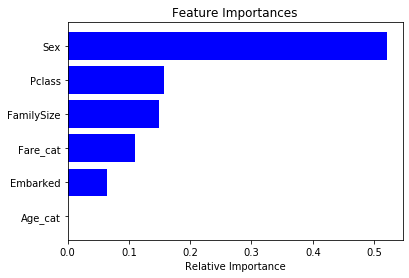

In [32]:
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(training_data,training_data_label)
features = training_data.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This is very telling! Our most important indicators are the cost for fare, your gender, class, and age. Then there is a drop off and the next bext indicators are if you were alone or not, and where you embarked out of. We could drop the non useful features, but considering how few we have, we will leave the data for now. This is an important concept to consider in the future if we find ourselves with too many features.

Before we go making any predictions, lets go ahead and cut our data into a few layers. We will want to split our training data into a 70/30 split. 70% will be used for training. the other 30% will again be split into 15% and 15%. one set will be for our validation set, while the other 15 is used for testing.

So why do this? You want to keep a large enough data set to train with accurately, so we want 70% for that purpose, however training doesn't end there. We will still want to tune our model appropriately, and doing so requires more data, which is where our validation set comes in. Any tuning of hyper parameters for our model will be done with our validation set. When we have multiple models trained and tuned, we compare the accuracy of these models by leveraging our final 15% training set to test our models against more data it hasn't seen before. This will ensure the most robust models we can create and ensure none of them are cheating off data they might of seen before. So lets go ahead and do that.

In [33]:
training_data.reset_index()

train_set_data, temp_set_data, train_set_label, temp_set_label = train_test_split(training_data, training_data_label, test_size=0.3, random_state = 40)
validation_set_data, test_set_data, validation_set_label, test_set_label = train_test_split(temp_set_data, temp_set_label, test_size=0.5, random_state = 40)

In [34]:
logistic_clf = LogisticRegression(solver='liblinear', C=2000)
logistic_clf = logistic_clf.fit(training_data, training_data_label)
print(logistic_clf.score(test_set_data, test_set_label))
y_pred = logistic_clf.predict(test_set_data)
y_pred_proba = logistic_clf.predict_proba(test_set_data)[:, 1]
[fpr, tpr, thr] = roc_curve(test_set_label, y_pred_proba)
print('Accuracy Score - ',accuracy_score(test_set_label, y_pred))
print('Classification Report - ',classification_report(test_set_label, y_pred))
print('auc Score - ',auc(fpr, tpr))

0.7611940298507462
Accuracy Score -  0.7611940298507462
Classification Report -                precision    recall  f1-score   support

           0       0.77      0.85      0.80        78
           1       0.75      0.64      0.69        56

    accuracy                           0.76       134
   macro avg       0.76      0.74      0.75       134
weighted avg       0.76      0.76      0.76       134

auc Score -  0.8486721611721612


In [45]:
kneighbors_clf = KNeighborsClassifier(n_neighbors=15)
kneighbors_clf = kneighbors_clf.fit(train_set_data, train_set_label)

y_pred = kneighbors_clf.predict(test_set_data)
y_pred_proba = kneighbors_clf.predict_proba(test_set_data)[:, 1]
[fpr, tpr, thr] = roc_curve(test_set_label, y_pred_proba)
print('Accuracy Score - ',accuracy_score(test_set_label, y_pred))
print('Classification Report - ',classification_report(test_set_label, y_pred))
print('auc Score - ',auc(fpr, tpr))

Accuracy Score -  0.7611940298507462
Classification Report -                precision    recall  f1-score   support

           0       0.75      0.88      0.81        78
           1       0.79      0.59      0.67        56

    accuracy                           0.76       134
   macro avg       0.77      0.74      0.74       134
weighted avg       0.76      0.76      0.75       134

auc Score -  0.834478021978022


In [46]:
logistic_cv_clf = LogisticRegressionCV(cv = 10)
logistic_cv_clf = logistic_cv_clf.fit(train_set_data, train_set_label)

y_pred = logistic_cv_clf.predict(test_set_data)
y_pred_proba = logistic_cv_clf.predict_proba(test_set_data)[:, 1]
[fpr, tpr, thr] = roc_curve(test_set_label, y_pred_proba)
print('Accuracy Score - ',accuracy_score(test_set_label, y_pred))
print('Classification Report - ',classification_report(test_set_label, y_pred))
print('auc Score - ',auc(fpr, tpr))

Accuracy Score -  0.753731343283582
Classification Report -                precision    recall  f1-score   support

           0       0.75      0.86      0.80        78
           1       0.76      0.61      0.67        56

    accuracy                           0.75       134
   macro avg       0.75      0.73      0.74       134
weighted avg       0.75      0.75      0.75       134

auc Score -  0.8463827838827839


In [42]:
random_forest_clf = RandomForestClassifier(random_state=1, max_depth=5)
random_forest_clf.fit(train_set_data, train_set_label)

y_pred = random_forest_clf.predict(validation_set_data)
y_pred_proba = random_forest_clf.predict_proba(validation_set_data)[:, 1]
[fpr, tpr, thr] = roc_curve(validation_set_label, y_pred_proba)
print('Accuracy Score - ',accuracy_score(validation_set_label, y_pred))
print('Classification Report - ',classification_report(validation_set_label, y_pred))
print('auc Score - ',auc(fpr, tpr))

Accuracy Score -  0.8582089552238806
Classification Report -                precision    recall  f1-score   support

           0       0.85      0.92      0.88        78
           1       0.88      0.77      0.82        56

    accuracy                           0.86       134
   macro avg       0.86      0.85      0.85       134
weighted avg       0.86      0.86      0.86       134

auc Score -  0.9111721611721612


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_86\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


So our accuracy as it stands is about 80%. Thats pretty good, but we can definitely improve it by tuning the hyper parameters of our model. We will do that by using what is called a RandomSearch. We will have various hyper parameters and this algorithm will jump around tuning them looking for the best possible value. It won't try every value but it'll try enough to get us near the most accurate model.

Since we were working with hyperparameter tuning, I used our validation set for this process. Our results are lower as a result of having less data, but if we use these parameters when training our data, we should fine a higher accuracy value.

In [43]:
max_iter= list(range(100,10000, 100))
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
cv = list(range(2,20))
param_grid = dict(max_iter=max_iter, solver=solver, cv=cv)

random = RandomizedSearchCV(estimator=LogisticRegressionCV(), param_distributions=param_grid, cv = 5, n_jobs=-1)

start_time = time.time()
random_result = random.fit(train_set_data, train_set_label)
random_validation = random.score(validation_set_data, validation_set_label)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Validation Set Prediction:", random_validation)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.778491 using {'solver': 'liblinear', 'max_iter': 2900, 'cv': 12}
Validation Set Prediction: 0.8507462686567164
Execution time: 6.243999242782593 ms


In [44]:
logistic_cv_clf = LogisticRegressionCV(solver= 'liblinear', max_iter= 7700, cv=12)
logistic_cv_clf = logistic_cv_clf.fit(training_data, training_data_label)

y_pred = logistic_cv_clf.predict(test_set_data)
y_pred_proba = logistic_cv_clf.predict_proba(test_set_data)[:, 1]
[fpr, tpr, thr] = roc_curve(test_set_label, y_pred_proba)
print('Accuracy Score - ',accuracy_score(test_set_label, y_pred))
print('Classification Report - ',classification_report(test_set_label, y_pred))
print('auc Score - ',auc(fpr, tpr))

survived = logistic_cv_clf.predict(testing_data)
test_df = pd.DataFrame(testing_passenger_id, columns=['PassengerId'])
test_df['Survived'] = survived
test_df.head()

test_df.to_csv('submission.csv', sep=',', encoding='utf-8')

Accuracy Score -  0.7611940298507462
Classification Report -                precision    recall  f1-score   support

           0       0.77      0.85      0.80        78
           1       0.75      0.64      0.69        56

    accuracy                           0.76       134
   macro avg       0.76      0.74      0.75       134
weighted avg       0.76      0.76      0.76       134

auc Score -  0.8486721611721612


In [ ]:
'''
Use Only When Submitting to Kaggle

survived = logistic_cv_clf.predict(testing_data)
test_df = pd.DataFrame(survived, columns=['Survived'])
test_df.head()

test_df.to_csv('submission.csv', sep=',', encoding='utf-8')
'''